In [3]:
import warnings
warnings.filterwarnings("ignore")

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import pylab as p
import scipy.stats as stats

In [119]:
df=pd.read_csv('insurance (2).csv')

In [120]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# size of dataframe

In [8]:
shape=df.shape
shape
#size of dataframe

(1338, 7)

In [9]:
def find_datatype():
    
    cols=['age','sex','bmi','children','smoker','region','charges']
    for i in df[cols]:
        print(i,'->',type(i))

In [10]:
find_datatype()

age -> <class 'str'>
sex -> <class 'str'>
bmi -> <class 'str'>
children -> <class 'str'>
smoker -> <class 'str'>
region -> <class 'str'>
charges -> <class 'str'>


# No missing values

In [40]:
def Checking_the_presence_of_missing_values():
    return df.isna().sum()
    

In [41]:
Checking_the_presence_of_missing_values()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 5 point summary

In [37]:
def five_point_summary():
    
    a=df.describe()
    a=a.iloc[3:,:]
    print(a)

In [38]:
five_point_summary()

      age       bmi  children       charges
min  18.0  15.96000       0.0   1121.873900
25%  27.0  26.29625       0.0   4740.287150
50%  39.0  30.40000       1.0   9382.033000
75%  51.0  34.69375       2.0  16639.912515
max  64.0  53.13000       5.0  63770.428010


# . Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

In [11]:
def  Show_Distribution(a):
    
    sns.distplot(a,
             hist_kws={'color':'blue', 'edgecolor':'black',
                       'linewidth':2, 'linestyle':'-'})

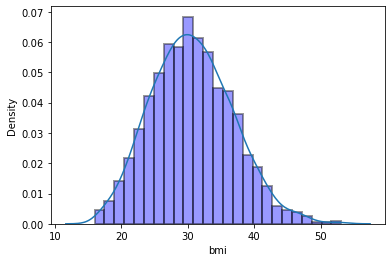

In [58]:
Show_Distribution(df['bmi'])

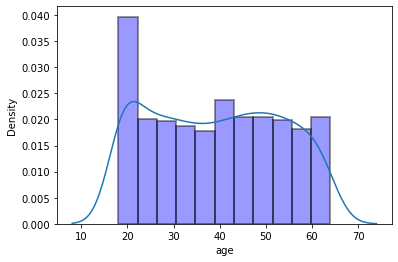

In [13]:

Show_Distribution(df['age'])

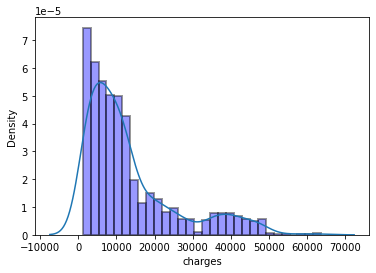

In [14]:

Show_Distribution(df['charges'])

# skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [15]:
df['bmi'].skew()

0.2840471105987448

In [23]:
skew(df['age'])

0.055610083072599126

In [24]:
skew(df['charges'])

1.5141797118745743

### Skew of bmi is very less as seen in the previous step
### Age is uniformly distributed and there's hardly any skew(Zero Skew)
### Charges are highly skewed(Right Skew as the value is +ve)

# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

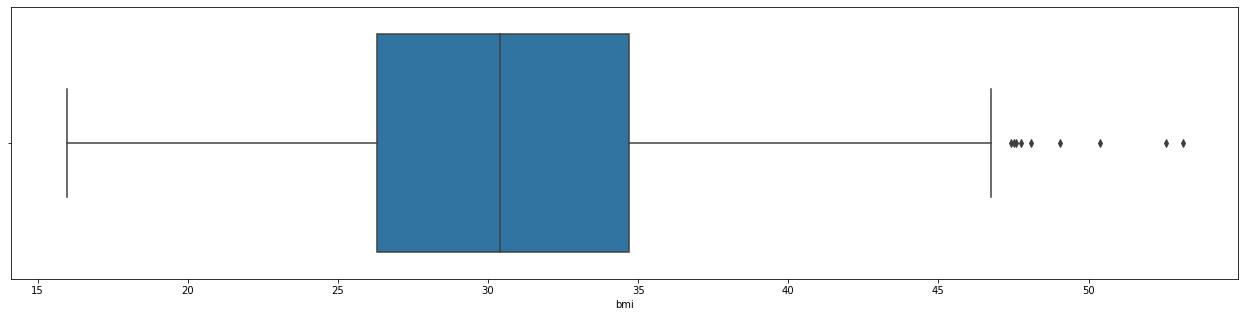

In [119]:
figure_size = (22,5 )
plt.figure(figsize=figure_size)
sns.boxplot(df['bmi'])
plt.show()

In [25]:
def find_outliers(a):    
    Q1 = np.percentile(a, 25,
                       interpolation = 'midpoint')
     
    Q3 = np.percentile(a, 75,
                       interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    
    upper = (a >= (Q3+1.5*IQR))
     
    
    print(np.where(upper))
 

In [26]:
find_outliers(df['bmi'])

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)


In [27]:
find_outliers(df['age'])

(array([], dtype=int64),)


In [28]:
find_outliers(df['charges'])

(array([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,   55,
         82,   84,   86,   94,  109,  123,  146,  158,  161,  175,  185,
        203,  223,  240,  242,  251,  252,  254,  256,  263,  265,  271,
        281,  288,  292,  298,  312,  314,  322,  327,  328,  330,  338,
        373,  377,  381,  420,  421,  422,  441,  476,  488,  500,  524,
        530,  543,  549,  558,  569,  577,  587,  609,  615,  621,  623,
        629,  665,  667,  668,  674,  677,  682,  689,  697,  706,  725,
        736,  738,  739,  742,  759,  803,  819,  826,  828,  842,  845,
        850,  852,  856,  860,  883,  893,  901,  917,  947,  951,  953,
        956,  958, 1001, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049,
       1062, 1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139,
       1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249,
       1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323], dtype=int64),)


### Bmi has a few extreme values
#### Charges as it is highly skewed, there are quiet a lot of extreme values

# Distribution of categorical columns (include children) 

In [130]:
col=['sex','children','smoker','region']
for i in col:
    print(i)
    print(df[i].value_counts())
    print(" ")
   

sex
male      676
female    662
Name: sex, dtype: int64
 
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
 
smoker
no     1064
yes     274
Name: smoker, dtype: int64
 
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
 


<AxesSubplot:xlabel='sex'>

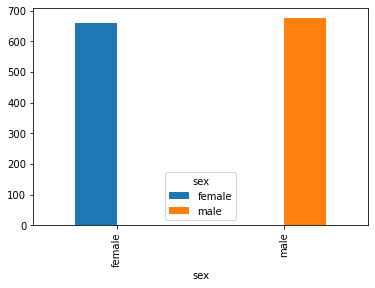

In [70]:
column = 'sex'
df.groupby(["sex",column]).size().unstack(level=1).plot(kind='bar')

<AxesSubplot:xlabel='smoker'>

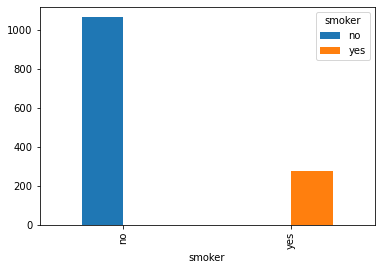

In [61]:
column = 'smoker'
df.groupby(["smoker", column]).size().unstack(level=0).plot(kind='bar')

<AxesSubplot:xlabel='region'>

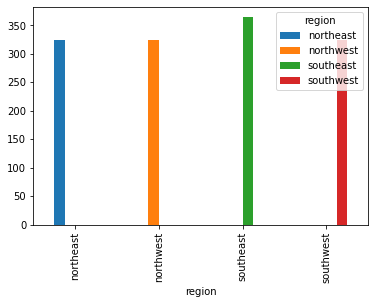

In [73]:
column = 'region'
df.groupby(["region", column]).size().unstack(level=0).plot(kind='bar')

<AxesSubplot:xlabel='children'>

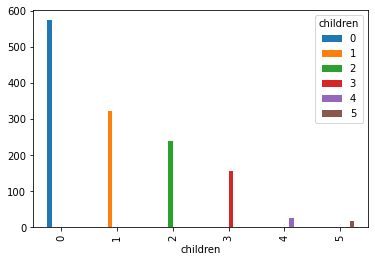

In [81]:
column = 'children'
df.groupby(["children", column]).size().unstack(level=0).plot(kind='bar')

### There are a lot more non-smokers than there are smokers in the data
### Instances are distributed evenly accross all regions
### Gender is also distributed evenly
### Most instances have less than 2 children and very few have 4 or 5 children

# Pair plot that includes all the columns of the data frame

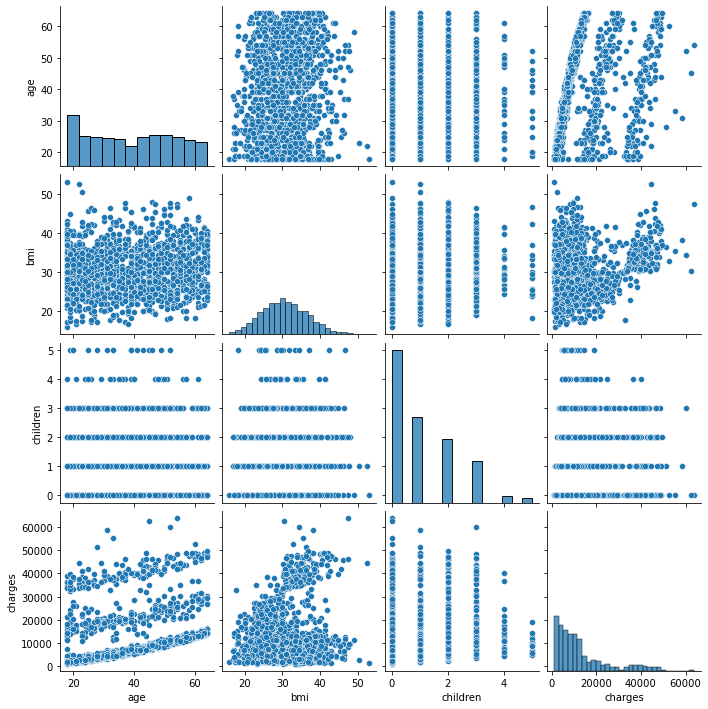

In [30]:
sns.pairplot(df)

In [145]:
df.groupby('smoker')['charges']
df1=df[['smoker','charges']]
df1


,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
...,...,...
1333,no,10600.54830
1334,no,2205.98080
1335,no,1629.83350
1336,no,2007.94500



# Do charges of people who smoke differ significantly from the people who don't?

In [83]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker'>

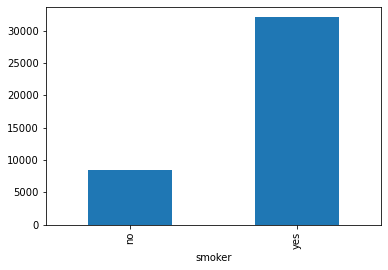

In [95]:
df.groupby('smoker')['charges'].mean().plot(kind='bar')

In [103]:
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(df[df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


# Does bmi of males differ significantly from that of females? 

<AxesSubplot:xlabel='sex'>

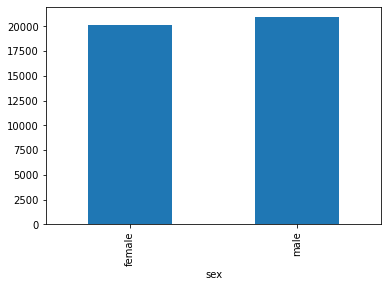

In [167]:
df2=df.groupby('sex')['bmi'].sum()
df2.plot.bar()

In [105]:
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


# Is the proportion of smokers significantly different in different genders?

In [108]:
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


### Proportion of smokers in males is greater than females

# Is the distribution of bmi across women with no children, one child and two children, the same? 

In [121]:
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


df1 =df[df['sex'] == 'female'].copy()

zero =df1[df1.children == 0]['bmi']
one = df1[df1.children == 1]['bmi']
two = df1[df1.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
